In [114]:
import numpy as np
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib
import os
from os import path
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [115]:
df = pd.read_csv(r'qiancheng_data.csv',encoding='gbk')

In [116]:
#df.head()

# 数据清洗
## 只要北京区域的数据

In [117]:
#df.company_site[len(df.company_site) > 2]

In [118]:
df_BJ = df[df.company_site.str.startswith('北京')==True]

In [119]:
df_BJ.head()

,title,company_name,salary,company_site,experience_required,edu_required,release_time,company_welfare,job_info,company_location,company_info
0,Python开发工程师,联合永道（上海）信息技术有限公司,1-1.5万/月,北京-顺义区,无工作经验,招3人,12-06发布,"['五险一金', '免费班车', '员工旅游', '交通补贴', '餐饮补贴', '工作环境...","['1.精通Python', '2.熟悉SQL语言，能熟练使用mysql，了解常用的SQL性...",'北京市顺义区后沙峪 中国航信高科技产业园',联合永道是一家专注于教育领域软件产品研发与销售的高新技术企业，主要从事教育软件产品的开发及应...
1,Python实习-机器学习方向,寰宇优才教育科技（北京）有限公司,0.8-1万/月,北京-朝阳区,无工作经验,招6人,12-06发布,"['五险一金', '补充医疗保险', '补充公积金', '员工旅游', '交通补贴', '出...","['（能力不足，但有Python开发意向者，可放宽要求提供实习岗位）', '', '1.本科...",'新文化大街',寰宇优才教育科技（北京）有限公司
2,Python开发工程师,北京万维盈创科技发展有限公司,0.8-1.5万/月,北京-昌平区,无工作经验,本科,12-06发布,"['年终奖金', '员工旅游', '定期体检', '专业培训', '交通补贴', '通讯补贴...","['岗位职责：', '1.协助团队进行桌面应用开开发框架的搭建、设计及开发规划；', '2....",'北七家镇TBD云集中心',北京万维盈创科技发展有限公司（简称万维盈创）是一家专业的环保物联网产品与解决方案提供商。公司...
3,Python开发工程师,北京学神科技有限公司,1-1.5万/月,北京-昌平区,3-4年经验,大专,12-06发布,"['弹性工作', '年终奖金', '绩效奖金', '专业培训', '周末双休']","['', '岗位职责：', '1.围绕项目开展教学工作；', '2.给学生讲授知识点技术点以...",'昌平南邵',“学神IT教育”（网址：www.xuegod.cn）是北京学神科技有限公司旗下的在线教育品牌...
4,Python研发负责人(001066)\t\t\t\t(职位编号：rong360001066),北京融联世纪信息技术有限公司,3-5万/月,北京,无工作经验,本科,12-06发布,[],"['1.负责RC系统整体规划工作,负责团队工作；2.负责风控系统在线服务的设计、优化和研发工...",'时代网络大厦',融360（www、rong360、com）北京融联世纪信息技术有限公司，成立于2011年10...


In [120]:
#df_G = df_BJ.groupby('company_site')

## 薪资分布?

In [8]:
df_BJ.salary.describe()

count         5007
unique         298
top       1-1.5万/月
freq           625
Name: salary, dtype: object

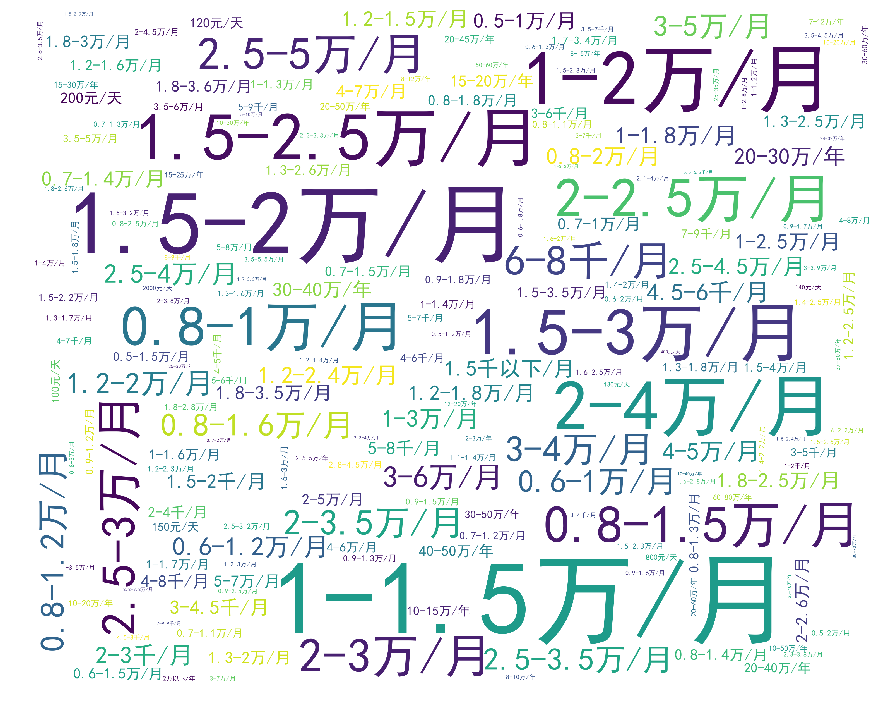

In [9]:
alice_coloring = np.array(Image.open(path.join("money.png")))
wordcloud = WordCloud(font_path='./fonts/simhei.ttf',width=900,height=400,background_color="white",mask=alice_coloring)
f, axs = plt.subplots(figsize=(15,15))
wordcloud.fit_words(df_BJ.salary.value_counts())
axs = plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 北京那些地区提供的岗位比较多?

In [10]:
df_BJ.company_site.value_counts()

北京         1957
北京-海淀区     1727
北京-朝阳区     1053
北京-西城区      174
北京-昌平区      164
北京-东城区      134
北京-丰台区      130
北京-大兴区      109
北京-石景山区      41
北京-通州区       23
北京-顺义区       20
北京-房山区       19
北京-门头沟区       3
北京-延庆区        2
Name: company_site, dtype: int64

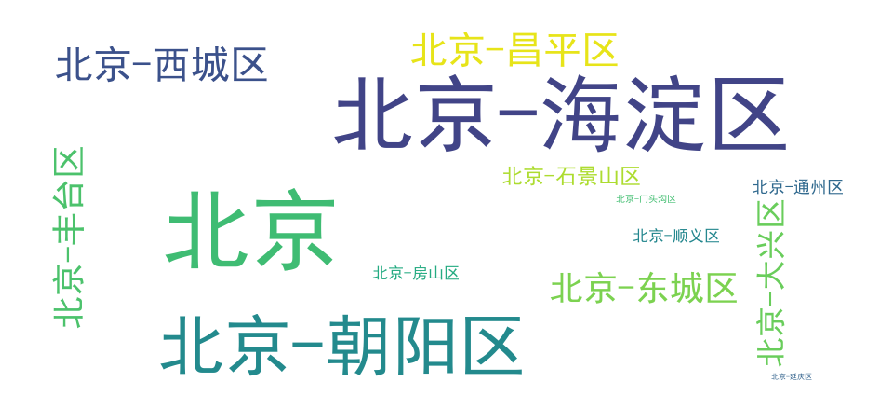

In [11]:
wordcloud = WordCloud(font_path='./fonts/simhei.ttf',width=900,height=400,background_color="white")
f, axs = plt.subplots(figsize=(15,15))
wordcloud.fit_words(df_BJ.company_site.value_counts())
axs = plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 工作年限要求?

In [12]:
df_BJ.experience_required.value_counts()

无工作经验      1932
3-4年经验     1691
2年经验        847
5-7年经验      677
1年经验        347
8-9年经验       39
10年以上经验      23
Name: experience_required, dtype: int64

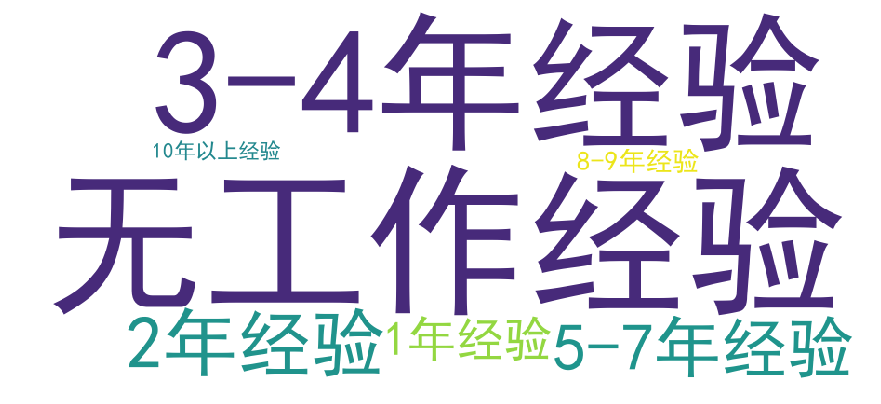

In [13]:
wordcloud = WordCloud(font_path='./fonts/simhei.ttf',width=900,height=400,background_color="white")
f, axs = plt.subplots(figsize=(15,15))
wordcloud.fit_words(df_BJ.experience_required.value_counts())
axs = plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 需要的技能和工作内容

In [25]:
# a = ''.join(df_BJ.job_info.str[1:-1].str.split())
# a
# for i in range(len(df_BJ.job_info.values)):
#     print(df_BJ.job_info.values[i].replace('','')
#df_BJ.job_info.str[1:-1].str.strip("\n").split(" ")
df_BJ.job_info=df_BJ.job_info.str[1:-1].str.replace("岗位职责",'').str.replace("工作描述",'').str.replace("n职能类别",'').str.replace("职位描述",'').str.replace("工作职责:",'').str.replace("任职要求",'').str.replace("工作职责",'').str.replace("'',",'').str.replace("xa0",'')

D:\Anaconda3-5.2\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [26]:
#df_BJ.job_info.dropna().str.split(',').apply(pd.value_counts)

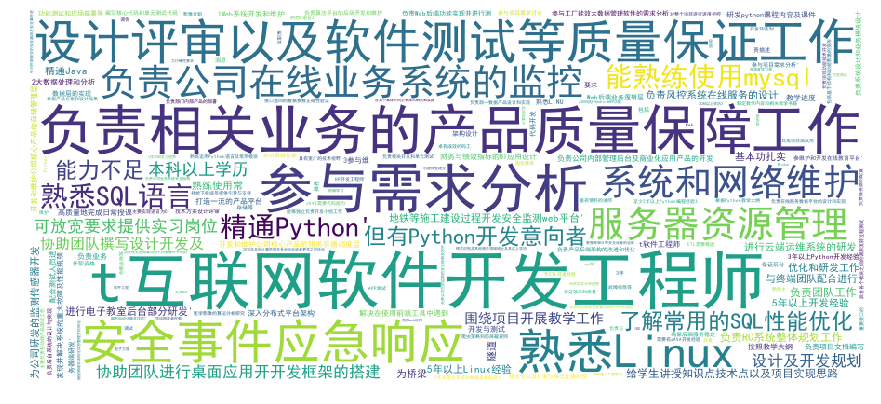

In [27]:
wordcloud = WordCloud(font_path='./fonts/simhei.ttf',width=900,height=400,background_color="white")
f, axs = plt.subplots(figsize=(15,15))
wordcloud.generate(str(df_BJ.job_info))
axs = plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 公司一般会提供什么福利诱惑?

In [121]:
df_BJ.company_welfare = df_BJ.company_welfare.str[1:-1].str.replace('\'','').str.replace("'',",'')

D:\Anaconda3-5.2\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [143]:
df_BJ.company_welfare

0                五险一金, 免费班车, 员工旅游, 交通补贴, 餐饮补贴, 工作环境好, 加班少
1       五险一金, 补充医疗保险, 补充公积金, 员工旅游, 交通补贴, 出国机会, 年终奖金, 绩...
2        年终奖金, 员工旅游, 定期体检, 专业培训, 交通补贴, 通讯补贴, 餐饮补贴, 一年加薪一次
3                            弹性工作, 年终奖金, 绩效奖金, 专业培训, 周末双休
4                                                        
5       五险一金, 补充医疗保险, 员工旅游, 交通补贴, 餐饮补贴, 通讯补贴, 定期体检, 专业...
6                                        五险一金, 定期体检, 周末双休
7       五险一金, 员工旅游, 餐饮补贴, 通讯补贴, 定期体检, 周末双休, 免费班车, 年终奖金...
9        五险一金, 补充医疗保险, 免费班车, 员工旅游, 专业培训, 餐饮补贴, 弹性工作, 定期体检
10                                             五险一金, 定期体检
11                   五险一金, 补充医疗保险, 专业培训, 绩效奖金, 年终奖金, 定期体检
12      五险一金, 补充医疗保险, 员工旅游, 交通补贴, 餐饮补贴, 专业培训, 绩效奖金, 股票...
13                                                       
14                                                       
15                                                       
16                     五险一金, 交通补贴, 餐饮补贴, 通讯补贴, 弹性工作, 定期体检
17                                                       
18            

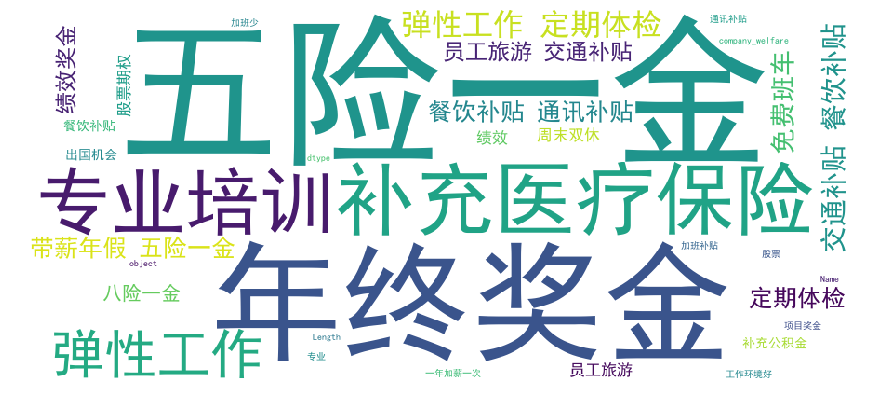

In [125]:
wordcloud = WordCloud(font_path='./fonts/simhei.ttf',width=900,height=400,background_color="white")
f, axs = plt.subplots(figsize=(15,15))
wordcloud.generate(str(df_BJ.company_welfare))
axs = plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 薪资和地区的关系

In [19]:
#df_BJ.company_site[df_BJ.salary.value_counts()]

In [20]:
df_BJ.groupby([df_BJ.salary,df_BJ.company_site]).count()

title  company_name  experience_required  \
salary     company_site                                             
0.4-1万/月   北京-海淀区            1             1                    1   
0.5-1.2万/月 北京                1             1                    1   
           北京-海淀区            1             1                    1   
0.5-1.5万/月 北京-朝阳区            2             2                    2   
           北京-海淀区            5             5                    5   
           北京-通州区            1             1                    1   
0.5-1万/月   北京               11            11                   11   
           北京-东城区            4             4                    4   
           北京-朝阳区            1             1                    1   
           北京-海淀区            4             4                    4   
           北京-西城区            2             2                    2   
0.5-2万/月   北京                1             1                    1   
           北京-海淀区            2             2                    2   
0.6-1.2万/月 北京                7             7                    7   
           北京-东城区            1             1                    1   
           北京-丰台区            1             1                    1   
           北京-大兴区            1             1                    1   
           北京-房山区            1             1                    1   
           北京-昌平区            4             4                    4   
           北京-朝阳区            2             2                    2   
           北京-海淀区           14            14                   14   
           北京-西城区            2             2                    2   
           北京-通州区            1             1                    1   
0.6-1.3万/月 北京-门头沟区           2             2                    2   
0.6-1.4万/月 北京-东城区            1             1                    1   
0.6-1.5万/月 北京                3             3                    3   
           北京-东城区            1             1                    1   
           北京-朝阳区            1             1                    1   
           北京-海淀区            5             5                    5   
           北京-石景山区           1             1                    1   
...                        ...           ...                  ...   
6-8千/月     北京-昌平区            1             1                    1   
           北京-朝阳区           23            23                   23   
           北京-海淀区           19            19                   19   
           北京-石景山区           2             2                    2   
           北京-西城区            5             5                    5   
6-9千/月     北京-海淀区            1             1                    1   
6.7-9千/月   北京-昌平区            1             1                    1   
60-80万/年   北京                2             2                    2   
           北京-海淀区            1             1                    1   
7-10万/月    北京-朝阳区            1             1                    1   
7-12万/年    北京                2             2                    2   
           北京-朝阳区            1             1                    1   
7-12万/月    北京                1             1                    1   
7-8.5千/月   北京-朝阳区            1             1                    1   
7-9.9千/月   北京-朝阳区            1             1                    1   
7-9千/月     北京                4             4                    4   
           北京-丰台区            2             2                    2   
           北京-大兴区            2             2                    2   
70元/天      北京-海淀区            1             1                    1   
8-10万/年    北京                1             1                    1   
           北京-海淀区            1             1                    1   
8-12万/年    北京                2             2                    2   
8-15万/年    北京                1             1                    1   
           北京-海淀区            1             1                    1   
8-9千/月     北京                2             2                    2   
80-100万/年  北京          

# 薪资和工作年限的关系

In [35]:
df_BJ.groupby([df_BJ.salary,df_BJ.experience_required]).count()

title  company_name  company_site  \
salary     experience_required                                      
0.4-1万/月   无工作经验                    1             1             1   
0.5-1.2万/月 无工作经验                    2             2             2   
0.5-1.5万/月 1年经验                     2             2             2   
           2年经验                     4             4             4   
           3-4年经验                   1             1             1   
           无工作经验                    1             1             1   
0.5-1万/月   1年经验                     4             4             4   
           2年经验                     4             4             4   
           无工作经验                   14            14            14   
0.5-2万/月   8-9年经验                   1             1             1   
           无工作经验                    2             2             2   
0.6-1.2万/月 1年经验                    11            11            11   
           2年经验                     5             5             5   
           3-4年经验                   6             6             6   
           无工作经验                   12            12            12   
0.6-1.3万/月 1年经验                     2             2             2   
0.6-1.4万/月 2年经验                     1             1             1   
0.6-1.5万/月 1年经验                     4             4             4   
           2年经验                     5             5             5   
           无工作经验                    2             2             2   
0.6-1.7万/月 无工作经验                    1             1             1   
0.6-1.8万/月 1年经验                     1             1             1   
           无工作经验                    1             1             1   
0.6-1万/月   1年经验                    11            11            11   
           2年经验                    13            13            13   
           3-4年经验                   5             5             5   
           无工作经验                   22            22            22   
0.6-2万/月   1年经验                     2             2             2   
           无工作经验                    1             1             1   
0.7-1.1万/月 1年经验                     1             1             1   
...                               ...           ...           ...   
6-10万/年    2年经验                     1             1             1   
6-12万/年    3-4年经验                   1             1             1   
6-8千/月     1年经验                    15            15            15   
           2年经验                    17            17            17   
           3-4年经验                   4             4             4   
           无工作经验                   56            56            56   
6-9千/月     2年经验                     1             1             1   
6.7-9千/月   无工作经验                    1             1             1   
60-80万/年   无工作经验                    3             3             3   
7-10万/月    5-7年经验                   1             1             1   
7-12万/年    1年经验                     1             1             1   
           2年经验                     2             2             2   
7-12万/月    5-7年经验                   1             1             1   
7-8.5千/月   1年经验                     1             1             1   
7-9.9千/月   1年经验                     1             1             1   
7-9千/月     1年经验                     4             4             4   
           2年经验                     1             1             1   
           无工作经验                    3             3             3   
70元/天      无工作经验                    1             1             1   
8-10万/年    2年经验                     1             1             1   
           无工作经验                    1             1             1   
8-12万/年    2年经验                     2             2             2   
8-15万/年    3-4年经验                   1             1             1   
           无工作经验                    1             1             1   
8-9千/月     无工作经验                    2             2             2   
80-100万/年  8-9年经验             